In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

/var/folders/gp/n7ttdtg56pg0s6ydv9zj9wth0000gn/T/ipykernel_13272/1543584708.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("datasource/bank_data_after_fe.csv")

In [3]:
df_original = pd.read_csv("datasource/data_after_another_fe.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3616 non-null   float64
 1   marital            3616 non-null   float64
 2   education          3616 non-null   float64
 3   default            3616 non-null   int64  
 4   balance            3616 non-null   float64
 5   housing            3616 non-null   int64  
 6   loan               3616 non-null   int64  
 7   duration           3616 non-null   float64
 8   campaign           3616 non-null   int64  
 9   pdays              3616 non-null   int64  
 10  previous           3616 non-null   int64  
 11  poutcome           3616 non-null   float64
 12  day_of_the_year    3616 non-null   int64  
 13  y                  3616 non-null   int64  
 14  job_admin.         3616 non-null   int64  
 15  job_blue-collar    3616 non-null   int64  
 16  job_entrepreneur   3616 

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
target_value = "y"

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=target_value),
    df[target_value],
    test_size=0.2,
    stratify=df[target_value],
    random_state=42,
)

In [8]:
X_train_og, X_test_og, y_train_og, y_test_og = train_test_split(
    df_original.drop(columns=target_value),
    df_original[target_value],
    test_size=0.2,
    stratify=df_original[target_value],
    random_state=42,
)

In [9]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
def printMetrics(test, pred): 
    cm = confusion_matrix(test,pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
    cm_display.plot()
    print(f"accuracy: {accuracy_score(test, pred)}")
    print(f"f1_score: {f1_score(test, pred)}")
    print(f"precision_score: {precision_score(test, pred)}")
    print(f"recall: {recall_score(test, pred)}")

accuracy: 0.8908839779005525
f1_score: 0.368
precision_score: 0.5476190476190477
recall: 0.27710843373493976


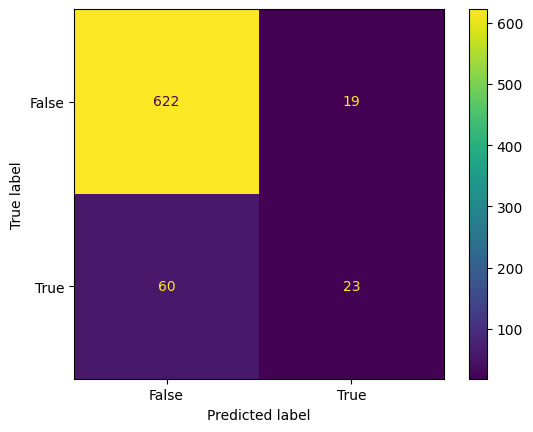

In [10]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(random_state=1, algorithm = "SAMME")
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
printMetrics(y_test,y_hat)

accuracy: 0.8977900552486188
f1_score: 0.4307692307692308
precision_score: 0.5957446808510638
recall: 0.3373493975903614


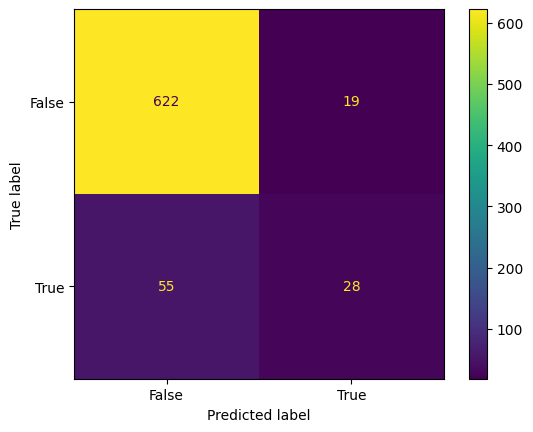

In [11]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(random_state=1, algorithm = "SAMME")
model.fit(X_train_og, y_train_og)
y_hat = model.predict(X_test_og)
printMetrics(y_test_og,y_hat)

In [12]:
from xgboost import XGBClassifier 

accuracy: 0.9074585635359116
f1_score: 0.524822695035461
precision_score: 0.6379310344827587
recall: 0.4457831325301205


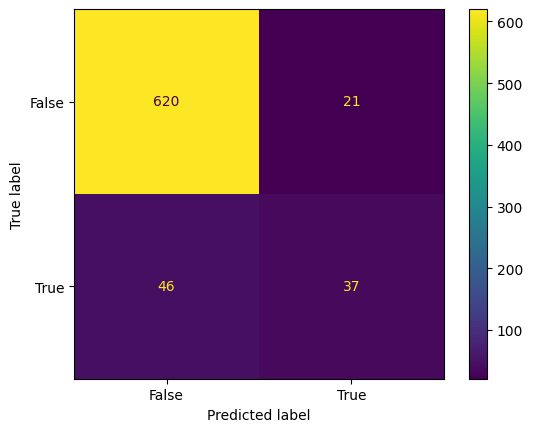

In [22]:
model = XGBClassifier(
    random_state=42,
    n_estimators=1000,  # Liczba drzew
    learning_rate=0.3,  # Szybkość "uczenia" się
    booster="gbtree",  # Jaki model wykorzystujemy (drzewo - gbtree, liniowe - gblinear)
    max_depth=5,  # Maksymalna głębokość drzewa    
)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
printMetrics(y_test,y_hat)

accuracy: 0.9046961325966851
f1_score: 0.5106382978723404
precision_score: 0.6206896551724138
recall: 0.43373493975903615


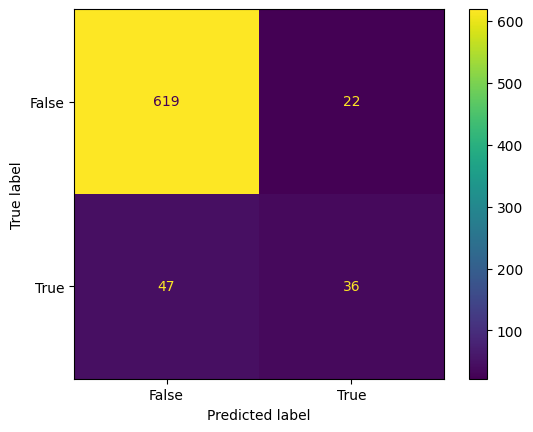

In [14]:
model = XGBClassifier(
    random_state=42,
    n_estimators=1000,  # Liczba drzew
    learning_rate=0.3,  # Szybkość "uczenia" się
    booster="gbtree",  # Jaki model wykorzystujemy (drzewo - gbtree, liniowe - gblinear)
    max_depth=5,  # Maksymalna głębokość drzewa    
)
model.fit(X_train_og, y_train_og)
y_hat = model.predict(X_test_og)
printMetrics(y_test_og,y_hat)

In [56]:
from sklearn.utils import compute_class_weight


weights = compute_class_weight(class_weight="balanced",classes= np.unique(df.y), y = df.y)
weights = {0:weights[0], 1:weights[1]}

In [57]:
weights

{0: 0.5651766176930291, 1: 4.335731414868105}

accuracy: 0.9088397790055248
f1_score: 0.5217391304347826
precision_score: 0.6545454545454545
recall: 0.43373493975903615


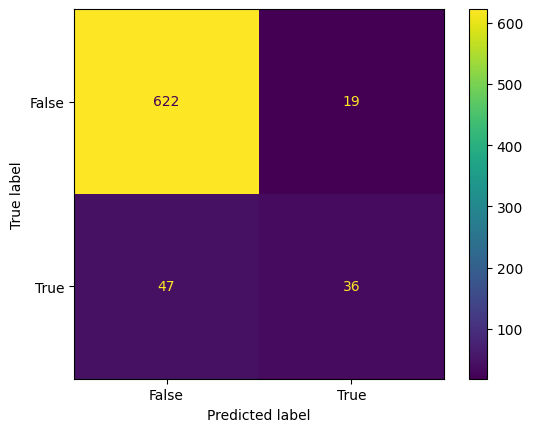

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(
    random_state=42, learning_rate=0.13, min_samples_split=5
)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
printMetrics(y_test,y_hat)

accuracy: 0.9005524861878453
f1_score: 0.45454545454545453
precision_score: 0.6122448979591837
recall: 0.3614457831325301


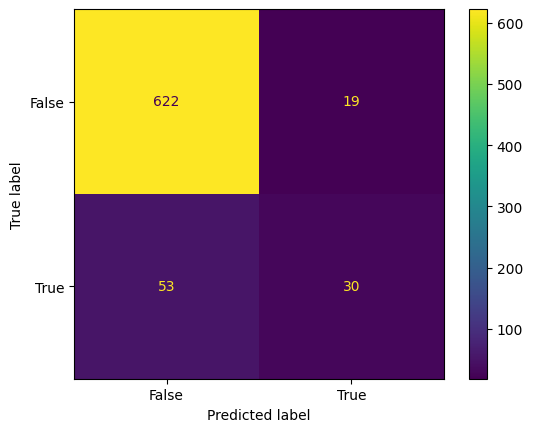

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(
    random_state=42, learning_rate=0.13
)
model.fit(X_train_og, y_train_og)
y_hat = model.predict(X_test_og)
printMetrics(y_test_og,y_hat)

accuracy: 0.9046961325966851
f1_score: 0.34285714285714286
precision_score: 0.8181818181818182
recall: 0.21686746987951808


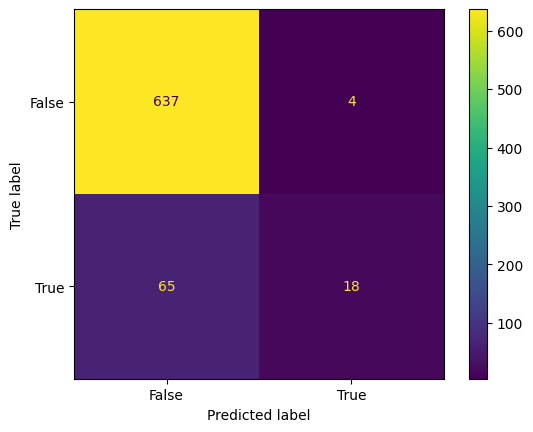

In [116]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 1200, # Liczba słabych estymatorów
                                  class_weight=weights)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
printMetrics(y_test,y_hat)

accuracy: 0.8093922651933702
f1_score: 0.5174825174825175
precision_score: 0.3645320197044335
recall: 0.891566265060241


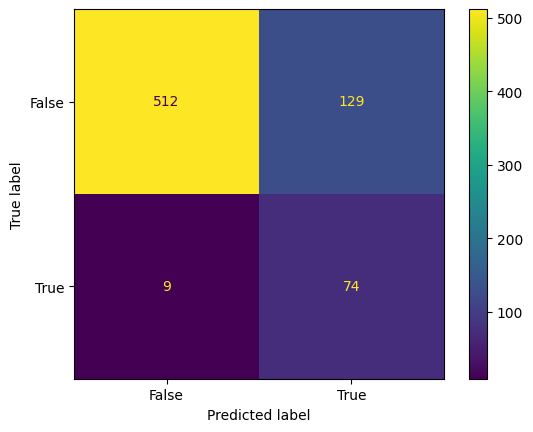

In [90]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="liblinear",penalty="l1", class_weight=weights)

lr.fit(X_train,y_train)
y_hat = lr.predict(X_test)

printMetrics(y_test, y_hat)

accuracy: 0.5069060773480663
f1_score: 0.19047619047619047
precision_score: 0.11731843575418995
recall: 0.5060240963855421


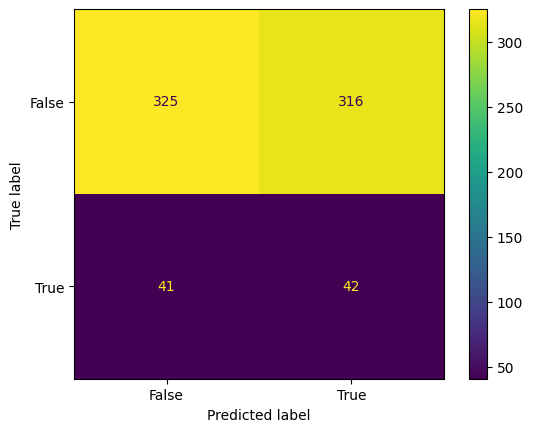

In [79]:
from sklearn.dummy import DummyClassifier
model = DummyClassifier(strategy="uniform")
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
printMetrics(y_test,y_hat)

In [150]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [165]:
estimators = [("LogisticRegression", LogisticRegression(max_iter=1000,solver="liblinear", penalty="l1", class_weight=weights)),
              ("DecisionTree", DecisionTreeClassifier(max_depth=6, min_samples_leaf=20, class_weight=weights)),
              ("Gradient", GradientBoostingClassifier(random_state=42, learning_rate=0.13, min_samples_split=6)),
              ("RandomForestClassifier",  RandomForestClassifier(random_state= 42,n_estimators = 1000, n_jobs = -1)),
              ("XGBClassifier", XGBClassifier(random_state=42, n_estimators=1000, learning_rate=0.3, booster="gbtree", max_depth=5)),
              ("SVC", SVC()),
              ("Bayes", GaussianNB())]

In [199]:
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(solver="liblinear", penalty="l1", class_weight={0:1, 1:2.6}))#1,2
clf.fit(X_train, y_train).score(X_test, y_test)

0.9060773480662984

accuracy: 0.9060773480662984
f1_score: 0.6136363636363636
precision_score: 0.5806451612903226
recall: 0.6506024096385542


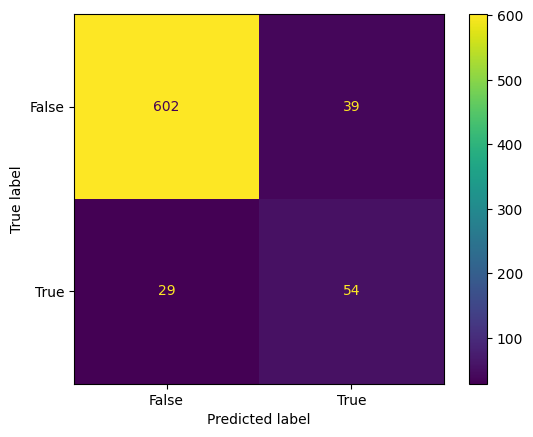

In [200]:
y_hat = clf.predict(X_test)
printMetrics(y_test, y_hat)

In [187]:
max_f1 = 0
i_f1 = 2
for i in (2.5,2.6,2.7,2.8,2.9,3):
    clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(penalty="l2", class_weight={0:1, 1:i}))#1,2
    clf.fit(X_train, y_train)
    y_hat = clf.predict(X_test)
    curr_f1 = f1_score(y_test,y_hat)
    if curr_f1 > max_f1:
        max_f1 = curr_f1
        i_f1 = i

In [188]:
print(max_f1)

0.6136363636363636


In [191]:
max_f1 = 0
i_f1 = 2
for i in (2.5,2.6,2.7,2.8,2.9,3):
    clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(penalty="l2", class_weight={0:1, 1:i}))#1,2
    clf.fit(X_train, y_train)
    y_hat = clf.predict(X_test)
    curr_f1 = recall_score(y_test,y_hat)
    if curr_f1 > max_f1:
        max_f1 = curr_f1
        i_f1 = i

In [192]:
print(max_f1)

0.6506024096385542


In [193]:
print(i_f1)

2.6


accuracy: 0.9171270718232044
f1_score: 0.5833333333333334
precision_score: 0.6885245901639344
recall: 0.5060240963855421


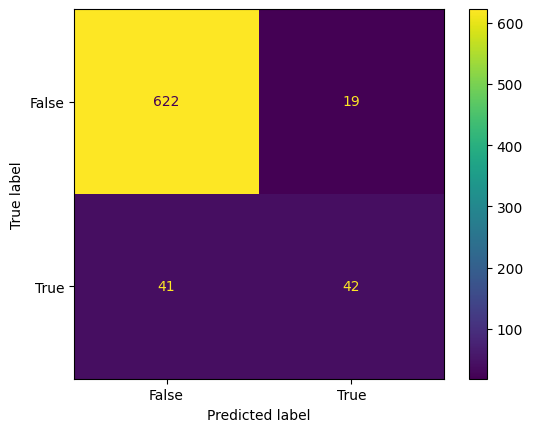

In [172]:
from sklearn.ensemble import VotingClassifier
model = VotingClassifier(estimators=estimators, voting='hard')
model.fit(X_train,y_train) 
y_hat = model.predict(X_test)
printMetrics(y_test,y_hat)

In [170]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(estimator= DecisionTreeClassifier(max_depth=6, min_samples_leaf=50, class_weight=weights),
                        n_estimators=10, random_state=42)
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.7886740331491713

accuracy: 0.7886740331491713
f1_score: 0.45161290322580644
precision_score: 0.32142857142857145
recall: 0.7590361445783133


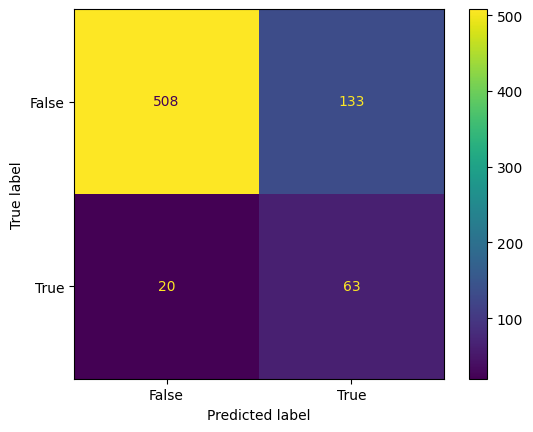

In [171]:
y_hat = clf.predict(X_test)
printMetrics(y_test, y_hat)